# Advertising Sales Channel Prediction

### Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset and  Information

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
#Let's check how the data is distributed
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Reviewing Data Set at initial stage, found continous datatypes; Target variable data is sales which seems to represent regression problem

In [4]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### TV, Radio, Newspaper and Sales are floating data columns; unnamed: 0 is integer data type columns.

There are 200 Rows and 5 Columns in Data Set.

1. target is sales

2. features are TV,radio and newspaper

3. All are continous/numeric data

In [5]:
# no. of rows and coloumns
df.shape

(200, 5)

# Exploratory Data Analysis (EDA)

In [6]:
df = df.drop("Unnamed: 0", axis=1)

* dropped the unnamed column as it was not giving any insight over the sales details and was just a numbered data that was basically of no use to us since we have indexing present for our data frame.

In [7]:
# check for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### There are no null or missing values in data set

In [8]:
# check the stats

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


* we see that only the newspaper column shows a huge gap between it's 75% quantile to it's maximum value while the other two feature columns show reasonable increase between each of their quantiles.

In [9]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Data Visualization

<AxesSubplot:xlabel='sales', ylabel='Density'>

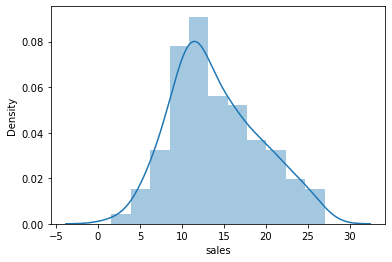

In [10]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

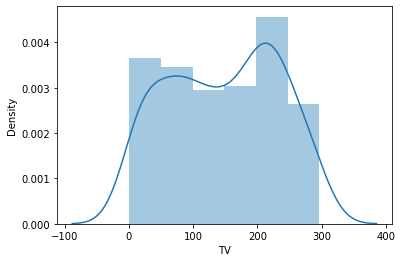

In [11]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

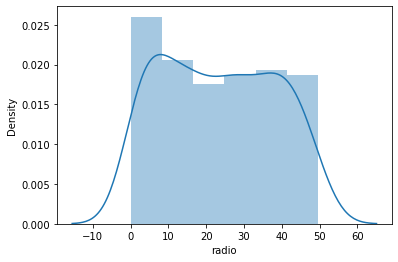

In [12]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

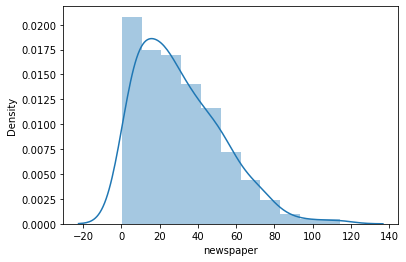

In [13]:
sns.distplot(df['newspaper'])

## Pair Plot

<Figure size 1080x720 with 0 Axes>

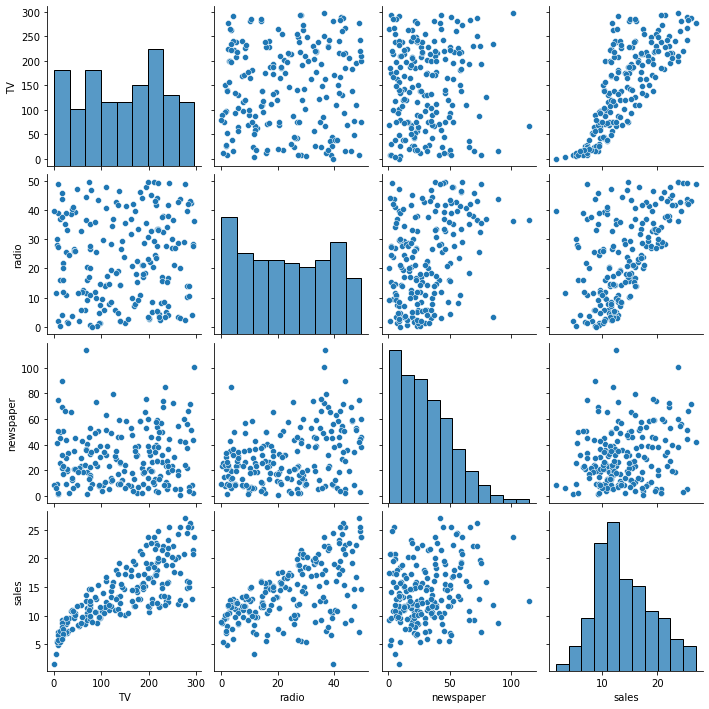

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

* With the help of above pairplot we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern into it. 

## Box Plot

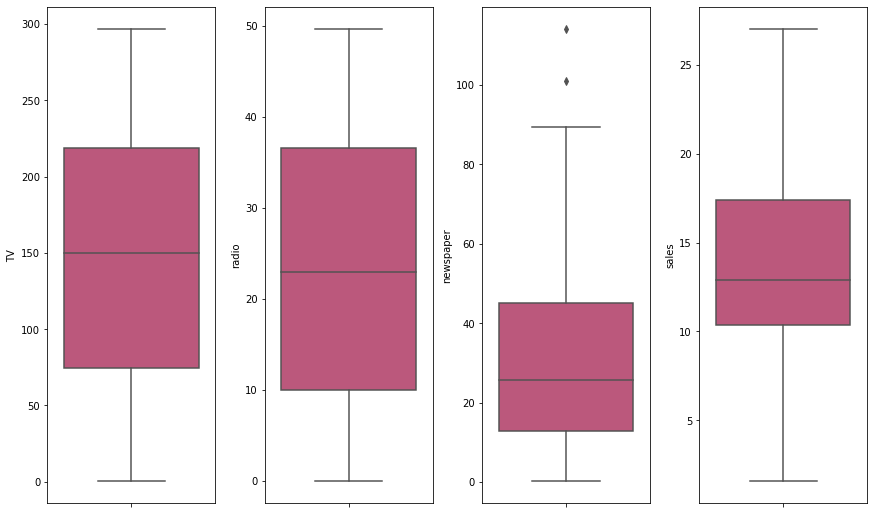

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

* The above boxplot shows that only the newspaper column has 2 outliers which may be genuine or not that will need to be checked and treated if required.

## Distribution Plot

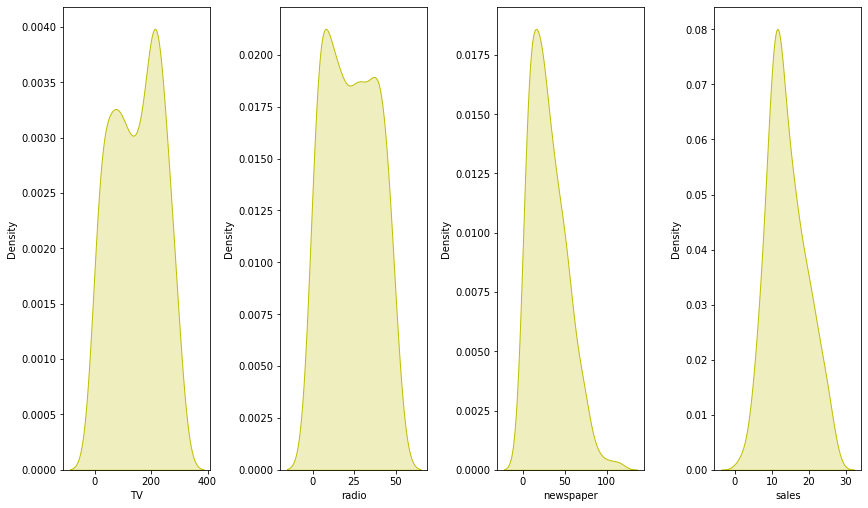

In [16]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

* Looking at the above distribution plot we can see that almost all the columns are maintaining the bell shape curve except for the newspaper column where we can see a visible skewness. 

## Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

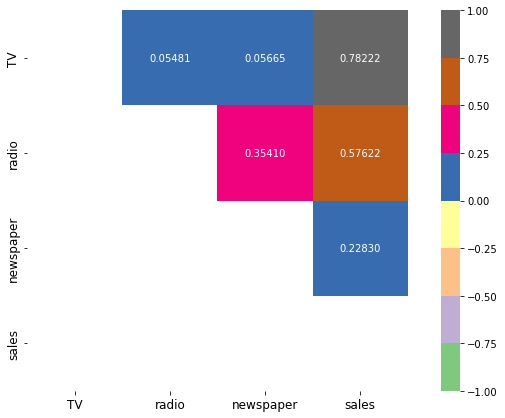

In [17]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* In the above heatmap we can see that there are no negative correlation present in between our features and label or between the feature columns either. Noticing the sales part we see that it has a high correlation with TV and a low correlation with Newspaper.

## Line Plots

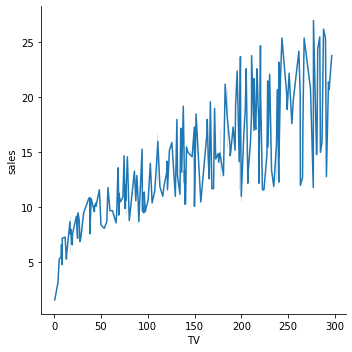

In [18]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

* The line plot for TV vs Sales shows a proper increasing pattern wherein the TV advertisements are playing a major role in the marketing field thus inreasing the sales.

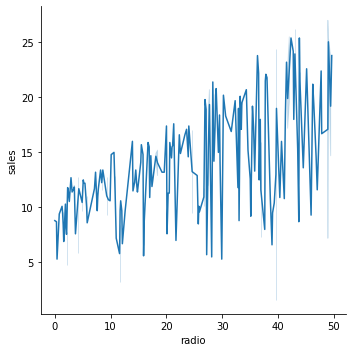

In [19]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

* The line plot for Radio vs Sales do not show a dominant relationship when it comes to sales like the TV option but it is definitely contributing towards the sales parameter.

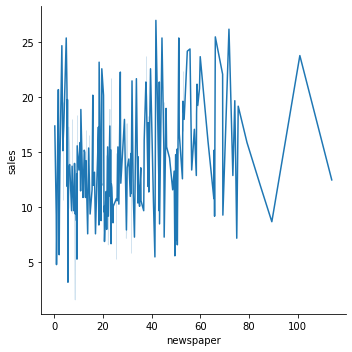

In [20]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

* Lastly, looking at the line plot for Newspaper vs Sales we see a very random trend where in the begin the contribution is way better than towards the end showing that the outliers reflecting in our data are mere flukes where in it contributed towards the sales from that mode of marketing.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [21]:
X = df.drop('sales', axis=1)
Y = df['sales']

* I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [22]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

Note: Trying to retain all the original data therefore not treating the outliers to ensure I do not have any data loss for my model creation.

# Creating the training and testing data sets

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

* taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

# Machine Learning Model for Regression and Evaluation Metrics

In [24]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

* I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [25]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.6611334844530619
R2 Score is: 92.20737408493858
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 3.496739130554232


Created the Linear Regression model and checked it's evaluation metrics.

In [26]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 3.6048001995986403
R2 Score is: 63.30244246991666
Cross Validation Score: 72.20715307684598
R2 Score - Cross Validation Score is -8.90471060692932


Created the Support Vector Regression model and checked it's evaluation metrics.

In [27]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 3.456407094079052
R2 Score is: 66.26159565701089
Cross Validation Score: 62.652074809515156
R2 Score - Cross Validation Score is 3.6095208474957303


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [28]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3.6236907586342753
R2 Score is: 62.91681566364689
Cross Validation Score: 62.56741204507949
R2 Score - Cross Validation Score is 0.34940361856739344


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [29]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 3.402031170365252
R2 Score is: 67.31478545730035
Cross Validation Score: 61.79331273559422
R2 Score - Cross Validation Score is 5.521472721706125


In [30]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.1716921569871401
R2 Score is: 96.12294636659743
Cross Validation Score: 90.90044012687845
R2 Score - Cross Validation Score is 5.222506239718982


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [31]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.163231503781359
R2 Score is: 96.17873572196949
Cross Validation Score: 95.86007140956852
R2 Score - Cross Validation Score is 0.31866431240096915


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [32]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.589554927334662
R2 Score is: 92.86447647346544
Cross Validation Score: 93.55209057621845
R2 Score - Cross Validation Score is -0.6876141027530025


Created the Extra Trees Regressor model and checked it's evaluation metrics.

# Hyperparameter tuning

In [33]:
# Choosing Ada Boost Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

After comparing all the regression models I have selected Ada Boost Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [34]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [35]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

I trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [36]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 111}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [37]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.18348660788863


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Saving the best model

In [38]:
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']

Finally, I am saving my best regression model using the joblib library.

## If you are doing business and are not into tv advertising, you are losing business. It is the most dependable and traditional way of advertising. TV advertising on channels appeals to the masses at large.